### 1. 分布が左右対称でない場合
ひと山であるが、
1. 正の値しかとらない
2. 分布が左右対称ではない

という特徴を持つデータに対しては、カイ二乗分布、またはその別表現であるガンマ分布のあてはめが有効である。  

$$
g(x|k,s)=\frac{1}{s\Gamma (k)}\biggl(\frac{x}{s} \biggr)^{k-1}\exp\biggl(-\frac{x}{s} \biggr)
$$

この式から$g(x|k/2,2s)=\chi^2(x|k,s)$であることがわかる。  
また、$\Gamma (k)=(k-1)!$である。  
  
データ$D=\{x^{(1)},x^{(2)},\cdots,x^{(N)} \}$があるとする。  
対数尤度は、
$$
L(k,s|D)=\sum_{n=1}^N\biggl[-\ln\{s\Gamma(k) \}+(k-1)\ln \frac{x^{(n)}}{s}-\frac{x^{(n)}}{s} \biggr]
$$

となるので、パラメータ$k,s$で微分して0と等値として計算する。  

$$
0=\frac{\partial L}{\partial s}=\sum_{n=1}^N\biggl(-\frac{k}{s}+\frac{x^{(n)}}{s^2} \biggr)\\
0=\frac{\partial L}{\partial k}=\sum_{n=1}^N\biggl\{-\frac{\Gamma'(k)}{\Gamma(k)}+\ln\frac{x^{(n)}}{s} \biggr\}
$$
上の式からは、
$$
\hat{s}=\frac{1}{\hat{k}N}\sum_{n=1}^Nx^{(n)}=\frac{\hat{\mu}}{\hat{k}}
$$
と計算できるが、下の式では未知パラメータがガンマ関数の中に埋め込まれているので、近似でもしない限り計算できない。  
ここで、**モーメント法**という手法を使用する。  
1次のモーメントは、
$$
<x>=\int_0^\infty dx xg(x|k,s)=s\frac{\Gamma(k+1)}{\Gamma(k)}\times\int_0^\infty dxg(x|k+1,s)=ks
$$
と計算できる。
2次のモーメントは、
$$
<x^2>=\int_0^\infty dx x^2g(x|k,s)=s^2\frac{\Gamma(k+2)}{\Gamma(k)}\times\int_0^\infty dxg(x|k+2,s)=k(k+1)s^2
$$
と求まる。  
1次と2次のモーメントは、データからも
$$
<x>=\frac{1}{N}\sum_{n=1}^Nx^{(n)}\\
<x^2>=\frac{1}{N}\sum_{n=1}^Nx^{(n)2}
$$
と計算できる。
$\hat{\mu}=<x>$および$\hat{\sigma}^2=<x^2>-\hat{\mu}^2$と書けるから、モーメント法による推定量$\hat{k}_{mo},\hat{s}_{mo}$は次のように表せる。
$$
\hat{k}_{mo}=\frac{<x>^2}{<x^2>-<x>^2}=\frac{\hat{\mu}^2}{\hat{\sigma}^2}\\
\hat{s}_{mo}=\frac{<x^2>-<x>^2}{<x>}=\frac{\hat{\sigma}^2}{\hat{\mu}}
$$

#### 実行例
異常度の定義は、負の対数尤度$-\ln g(x'|\hat{k}_m,\hat{s}_m)$から$x'$に依存しない項を省略して、
$$
a(x')=\frac{x'}{\hat{s}_m}-(\hat{k}_m-1)\ln \frac{x'}{\hat{s}_m}
$$
閾値の設定については、異常度の確率分布を求めることが簡単でないので、分位点を使用する。  
>手順3　(ガンマ分布による異常検知)  
>1. ステップ1(分位推定)　モーメント法、あるいは数値最適化におｙる最尤法によって、ガンマ分布にパラメータを推定する。
>2. ステップ2(異常度の定義)　新たな観測値$x'$を得るたびに、異常度$a(x')$を計算する。
>3. ステップ3(閾値の設定)　訓練データを使ってあらかじめ$\alpha$パーセンタイルに対応する異常度の値$a_{th}(\alpha)$を求めておき、$a(x')>a_{th}(\alpha)$なら警報発報



In [1]:
import pandas as pd
import numpy as np

davis = pd.read_csv('C:/Users/tanak/study/参考書/機械学習による異常検知/Davis.csv', index_col=0)

In [2]:
import pandas as pd
import numpy as np
from scipy.stats import gamma
import matplotlib.pyplot as plt

x = davis['weight']

N = len(x)
mu = np.mean(x)
si = np.std(x)

kmo = (mu/si)**2
smo = si**2/mu

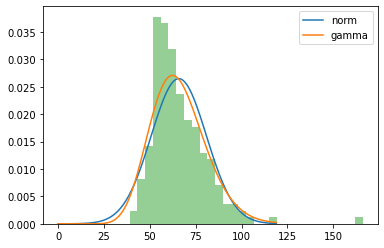

In [3]:
import matplotlib.pyplot as plt
from scipy.stats import gamma

def NormDist1d(x, mu, sig2):
    return 1/np.sqrt(2*np.pi*sig2) * np.exp(-(x-mu)**2 / (2*sig2))


x = davis['weight']

mu_hat = sum(x) / len(x)
var_hat = sum((x - mu_hat)**2) / len(x)

X = np.arange(0,120)
Y_norm = NormDist1d(X, mu_hat, var_hat)
Y_gamma = gamma.pdf(X, a=kmo,scale=smo)

plt.plot(X, Y_norm, label='norm');
plt.plot(X, Y_gamma, label='gamma')
plt.hist(davis['weight'], bins=30, density=True, alpha=.5);
plt.legend();

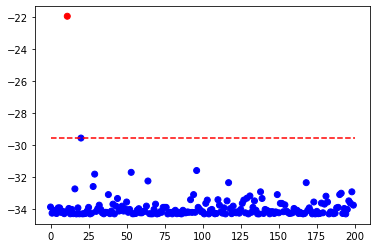

In [4]:
import pandas as pd
import numpy as np
from scipy.stats import gamma
import matplotlib.pyplot as plt

x = davis['weight']

# 平均と標準偏差の計算
N = len(x)
mu = np.mean(x)
si = np.std(x)

# kとsの最尤推定値の計算
kmo = (mu/si)**2
smo = si**2/mu

# 異常度の計算
a = davis['weight'] / smo - (kmo - 1)*np.log(davis['weight']/smo)

# パーセンタイルで閾値の設定
ath = np.sort(a)[-int(N*0.01)]

plt.scatter(np.arange(len(x)), a, color = ['red' if a > ath else 'blue' for a in a]);
plt.hlines(ath, xmin=0, xmax=200, linestyles='--', color='red');

### 2. 訓練データに異常標本が混ざっている場合
観測データ$D=\{x^{(n)}|n=1,\cdots,N \}$が得られているとする。  
ここで、$D$が背景雑音によって汚染されていると考える。  
ここでは、正常データが$x=3$を中心とするきれいな山で表されるのに対し、背景雑音が、$x=0$辺りを中心にしたなだらかな山で表されるとする。  
山を表現するのに正規分布を使ったとすると、式の上では次のようになる。
$$
p(x)=\pi_0N(x|\mu_0,\sigma_0^2)+\pi_1N(x|\mu_1,\sigma_1^2)
$$
ここで、添字の0は正常標本、1が異常標本を表している。  
そいて$\pi_0$が正常標本が観測される確率、$\pi_1$が異常標本が観測される確率を表す。  
$x$についての規格化条件から、
$$
1=\int_0^\infty dxp(x)=\pi_0+\pi_1
$$
が成り立つ必要がある。  
このような正規分布の一次結合で表される分布を、**混合正規分布**または混合ガウス分布と呼ぶ。

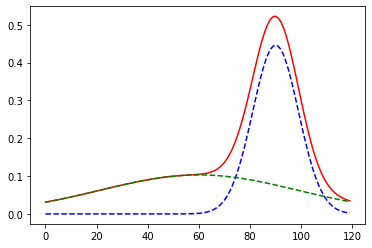

In [5]:
x= np.arange(-6,6,0.1)

y1 = NormDist1d(x, mu=3, sig2=0.8)
y2 = NormDist1d(x, mu=0, sig2=15)
plt.plot((y1+y2), color='red')
plt.plot(y1, linestyle='--', color='blue')
plt.plot(y2, linestyle='--', color='green')

このモデルのパラメータをまとめて、
$$
\boldsymbol{\theta}=(\pi_0,\mu_0,\sigma_0^2,\pi_1,\mu_1,\sigma_1^2)^T
$$
のようにベクトルで表す。
対数尤度$L(\boldsymbol{\theta}|D)$は、
$$
L(\boldsymbol{\theta}|D)=\sum_{n=1}^N\ln\bigl\{\pi_0N(x|\mu_0,\sigma_0^2)+\pi_1N(x|\mu_1,\sigma_1^2) \bigr\}
$$
である。  
これは、**期待値-最大化(EM)法**という技術で、パラメータ推定公式を導くことができる。

#### 期待値-最大化法:期待値ステップ
各観測値$x^{(n)}$が2つの分布のうちどちらから出てきたかを表す変数$z^{(n)}$を導入する。  
$z^{(n)}=0$なら$x^{(n)}$は0出身で、$z^{(n)}=1$なら$x^{(n)}$は1出身と考える。  
対数尤度は、
$$
L(\boldsymbol{\theta}|\boldsymbol{Z},D)=\sum_{n=1}^N\biggl[\delta(z^{(n)},0)\ln\bigl\{\pi_0N(x|\mu_0,\sigma_0^2)\bigr\}+\delta(z^{(n)},1)\ln\bigl\{\pi_1N(x|\mu_1,\sigma_1^2)\bigr\} \biggr]
$$
と書き換えられる。
$\delta(z^{(n)},0)$の期待値は、「第n標本」が0の山出身である確率を表している。  
$$
[\delta(z^{(n)},0)の期待値]:[\delta(z^{(n)},1)の期待値]=[\pi_0N(x|\mu_0,\sigma_0^2)]:[\pi_1N(x|\mu_1,\sigma_1^2)]
$$
となるので、いま、$\delta(z^{(n)},i)$の期待値を$q_i^{(n)}$とすれば($i=0,1$)、この比例式から、
$$
q_i^{(n)}=\frac{\pi_iN(x|\mu_i,\sigma_i^2)}{\pi_0N(x|\mu_0,\sigma_0^2)+\pi_1N(x|\mu_1,\sigma_1^2)}
$$
のように求めることができる。これは**帰属度**と呼ばれる。
#### 期待値-最大化法:最大化ステップ
$\delta(z^{(n)},i)$を$q_i^{(n)}$に置き換えたうえで対数尤度を微分する。
$$
0=\frac{\partial L}{\partial \mu_i}=-\sum_{n=1}^Nq_i^{(n)}\biggl(\frac{x^{(n)}-\mu_i}{\sigma_i^2} \biggr)\\
0=\frac{\partial L}{\partial (\sigma_i)^{-2}}=\sum_{n=1}^N\frac{q_i^{(n)}}{2}\bigl\{-(x^{(n)}-\mu_i)^2+\sigma_i^2 \bigr\}
$$
これらから次の結果が得られる。
$$
\hat{\mu}_i=\frac{\sum_{n=1}^Nq_i^{(n)}x^{(n)}}{\sum_{n'=1}^Nq_i^{(n')}}\\
\hat{\sigma}_i^2=\frac{\sum_{n=1}^Nq_i^{(n)}(x^{(n)}-\hat{\mu}_i)^2}{\sum_{n'=1}^Nq_i^{(n')}}
$$
$\pi$については、尤度に条件$\pi_0+\pi_1=1$をラグランジュ乗数$\lambda$で取り込んだ、
$$
L(\boldsymbol{\theta}|\boldsymbol{Z},D)-\lambda(\pi_0+\pi_1)
$$
を微分することで求まる。
$$
\hat{\pi}_i=\frac{1}{N}\sum_{n=1}^Nq_i^{(n)}
$$

>手順4 (1次元混合正規分布の期待値-最大化法)　K成分混合正規分布モデル
$$
p(x)=\pi_1N(x|\mu_1,\sigma_1^2)+\cdots+\pi_KN(x|\mu_K,\sigma_K^2)
$$
のパラメータ$\{\pi_i,\mu_i,\sigma_i^2\}(i=1,2,\cdots,K)$を求めるための手順は次の通り。
>1. パラメータ$\{\pi_i,\mu_i,\sigma_i^2\}(i=1,2,\cdots,K)$の初期値を適当に与える
>2. $\{\pi_i,\mu_i,\sigma_i^2\}(i=1,2,\cdots,K)$の値を基に、
$$
q_i^{(n)}=\frac{\pi_iN(x|\mu_i,\sigma_i^2)}{\sum_{l=1}^K\pi_lN(x|\mu_l,\sigma_l^2)}
$$
より、データ$x^{(n)}$の山$i$への帰属度$q_i^{(n)}$を求める
>3. $\{q_i^{(n)}\}$の値を基に、
$$
\hat{\mu}_i=\frac{\sum_{n=1}^Nq_i^{(n)}x^{(n)}}{\sum_{n'=1}^Nq_i^{(n')}}\\
\hat{\sigma}_i^2=\frac{\sum_{n=1}^Nq_i^{(n)}(x^{(n)}-\hat{\mu}_i)^2}{\sum_{n'=1}^Nq_i^{(n')}}\\
\hat{\pi}_i=\frac{1}{N}\sum_{n=1}^Nq_i^{(n)}
$$
を計算する
>4. 値が収束していなければ2に戻る

In [2]:
import numpy as np
from scipy.stats import norm

# データ数
N = 1000

# 混合させる分布のパラメータ
pi0 = 0.6
pi1 = 0.4
mu0 = 3
sig0 = 0.5
mu1 = 0
sig1 = 3

# 0,1を適当に振り分ける
attr = np.random.choice(a=[0, 1], size=N, p=[pi0, pi1])

# データを格納
x = np.array([-99.]*N)
x[attr==0] = norm.rvs(loc=mu0, scale=sig0, size=np.sum(attr==0))
x[attr==1] = norm.rvs(loc=mu1, scale=sig1, size=np.sum(attr==1))

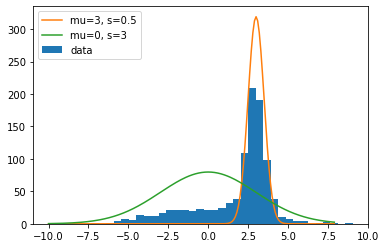

In [3]:
import matplotlib.pyplot as plt

_x = np.arange(-10,8,0.1)

plt.hist(x, bins=35, label='data');
plt.plot(_x, norm.pdf(_x, loc=mu0, scale=sig0)*400, label='mu=3, s=0.5')
plt.plot(_x, norm.pdf(_x, loc=mu1, scale=sig1)*600, label='mu=0, s=3')
plt.legend();

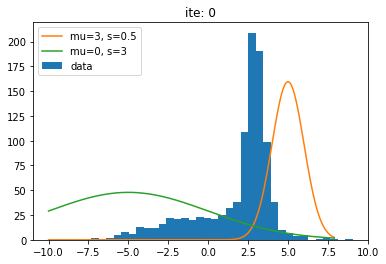

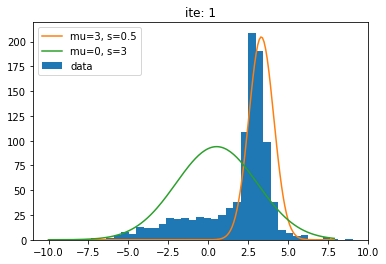

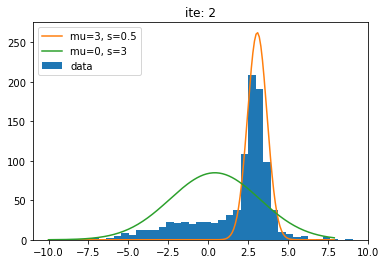

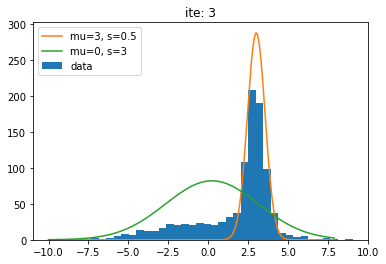

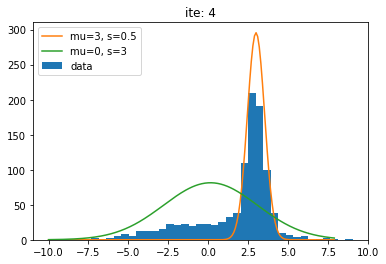

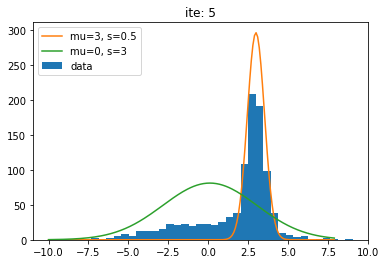

break 5
pi0, pi1:  0.5951701750523573 0.40482982494764275
mu0, mu1:  2.989222481525381 0.0871906846875785
sig0, sig1:  0.5391033591163014 2.94973755309319


In [4]:
# 初期値の設定
pi0 = 0.5
pi1 = 0.5

mu0 = 5
mu1 = -5

sig0 = 1
sig1 = 5

# 判定結果を格納させる
j = [False]*len(x)

for i in np.arange(100):
    plt.hist(x, bins=35, label='data');
    plt.plot(_x, norm.pdf(_x, loc=mu0, scale=sig0)*400, label='mu=3, s=0.5')
    plt.plot(_x, norm.pdf(_x, loc=mu1, scale=sig1)*600, label='mu=0, s=3')
    plt.legend();
    plt.title('ite: ' + str(i))
    plt.show()
    
    piN0 = pi0 * norm.pdf(x, loc=mu0, scale=sig0)
    piN1 = pi1 * norm.pdf(x, loc=mu1, scale=sig1)
    
    # 帰属度の計算
    qn0 = piN0 / (piN0 + piN1)
    qn1 = piN1 / (piN0 + piN1)

    # πの更新
    pi0 = np.sum(qn0)/N
    pi1 = np.sum(qn1)/N
    
    # μの更新
    mu0 = np.sum(qn0*x)/(N*pi0)
    mu1 = np.sum(qn1*x)/(N*pi1)
    
    # σの更新
    sig0 = np.sqrt(np.sum(qn0*(x-mu0)*(x-mu0)) / (N*pi0))
    sig1 = np.sqrt(np.sum(qn1*(x-mu1)*(x-mu1)) / (N*pi1))
     
    # 判定が変わらなければ終了
    if np.all(j == (qn0>qn1)):
        print('break', i)
        break

    j = qn0>qn1

print('pi0, pi1: ', pi0, pi1)
print('mu0, mu1: ', mu0, mu1)
print('sig0, sig1: ', sig0, sig1)

pi0, pi1:  0.5934424038470704 0.4065575961529296
mu0, mu1:  2.990023736410926 0.053081325064450666
sig0, sig1:  0.49331828970527386 2.9892567307451827


### 3. 分布がひと山にならない場合：近傍距離に基づく方法
#### k近傍法
$M$次元データ$N$個からなる$D=\{\boldsymbol{x}^{(1)},\cdots,\boldsymbol{x}^{(N)}\}$が与えられているとする。  
新たに観測した観測値$\boldsymbol{x'}$を中心とした$M$次元球を考える。  
1. 級の半径を決めたとき、その球の中に入る標本の数$k$がある基準値以下ならば、$\boldsymbol{x'}$は異常
2. 観測値$\boldsymbol{x'}$に近い順に$k$個の標本を選んだ時、それらを囲む球の半径$\epsilon_k$がある基準値以上なら$\boldsymbol{x'}$は異常

$D$を確率密度風に直接表現するとしたら次のような式になる。
$$
p_{emp}(\boldsymbol{x})=\frac{1}{N}\sum_{n=1}^N\delta(\boldsymbol{x}-\boldsymbol{x}^{(n)})
$$
これを経験分布と呼ぶ。  
任意の位置$\boldsymbol{x'}$の確率密度$p(\boldsymbol{x'})$が、$\boldsymbol{x'}$を中心とした半径$\epsilon$の球の中では一定であるとして近似すれば、
$$
p(\boldsymbol{x'})\times |V_M(\epsilon,\boldsymbol{x'})|\approx\int_{\boldsymbol{x}\in V_M(\epsilon,\boldsymbol{x'})}d\boldsymbol{x}p_{emp}(\boldsymbol{x})
$$
が成り立つ。  
ただし、$\boldsymbol{x'}$を中心とした半径$\epsilon$の$M$次元球内部の領域を$V_M(\epsilon,\boldsymbol{x'})$、その体積を$|V_M(\epsilon,\boldsymbol{x'})|$と表している。  
積分を実行すると、
$$
p(\boldsymbol{x'})=\frac{k}{N|V_M(\epsilon,\boldsymbol{x'})|}
$$
となる。$k$は領域$V_M(\epsilon,\boldsymbol{x'})$に含まれる$D$の要素の数である。  
$M$次元空間における球の体積は、半径$\epsilon$の$M$乗に比例するので、負の対数尤度を定義した場合、
$$
a(\boldsymbol{x'})=-\ln p(\boldsymbol{x'})=-\ln k +M\ln\epsilon +(定数)
$$
となる。
$\epsilon$を固定すれば$k$が小さいほうが高い異常度を与え、$k$を固定すれば$\epsilon$が大きいほうが高い異常度を与える。このような手法をそれぞれ、**$k$近傍法**または**$\epsilon$近傍法**と呼ぶ。

>手順6(近傍法による異常検知)　異常が含まれないと信じられるデータセット$D$を用意する。標本間の距離尺度を決める(通常、ユークリッド距離かマハラノビス距離)  
(1)k基準　なんらかの方法で適切な$\epsilon$を決める。また、近傍数の閾値$k_{th}$を与える
　1. 新たな観測値$\boldsymbol{x'}$に対して、半径$\epsilon$の範囲に入る標本を$D$から選ぶ  
　2. その標本の数$k$が閾値$k_{th}$を下回ったら$\boldsymbol{x'}$は異常
>
>(2)$\epsilon$基準　なんらかの方法で適切な$k$を決める。また、近傍数の閾値$\epsilon_{th}$を与える
　1. 新たな観測値$\boldsymbol{x'}$に対して、$k$近傍となる標本を$D$から選ぶ  
　2. それらを取り囲む最小の半径$\epsilon$を求める。それが$\epsilon_{th}$を上回ったら$\boldsymbol{x'}$は異常
 
#### 局所外れ値度
下の図には2つのクラスターがあるが、密集度に大きな違いがある。  
素朴な近傍距離の考え方からすると、赤い星ではなく緑の星を異常と判断してしまう。  
そちらのほうが疎な領域にあるためである。  

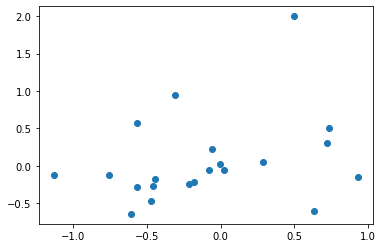

In [113]:
X = np.concatenate([
np.array(list(x1)+[0.5]).reshape(-1,1),
np.array(list(y1)+[2]).reshape(-1,1)
], axis=1)

plt.scatter(X[:,0], X[:,1])

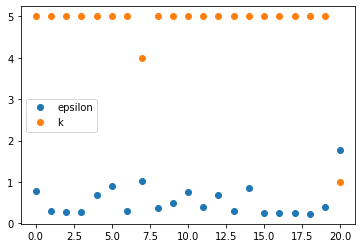

In [136]:
from sklearn.neighbors import NearestNeighbors

# 半径
k_thresh = 1

# 近傍点の算出
d_neigh = NearestNeighbors(n_neighbors=5)
d_neigh.fit(X)
d = neigh.kneighbors(X)[0]

# 半径k_thresh内の点の数
r = [np.sum(np.array(i)<k_thresh) for i in d]

# 𝜖基準
plt.plot(d.max(axis=1), 'o', label='epsilon')

# k基準
plt.plot(r, 'o', label='k')

plt.legend();

In [134]:
d

array([[0.        , 0.19935472, 0.4997966 , 0.50284648, 0.77903481],
       [0.        , 0.08980052, 0.10171974, 0.25347942, 0.29207881],
       [0.        , 0.04649249, 0.18569356, 0.25347942, 0.27219629],
       [0.        , 0.09803241, 0.15962237, 0.24091947, 0.27219629],
       [0.        , 0.50284648, 0.54621919, 0.67443629, 0.68299241],
       [0.        , 0.54621919, 0.74481008, 0.82497907, 0.90309096],
       [0.        , 0.08980052, 0.11259467, 0.20714645, 0.29725595],
       [0.        , 0.4535972 , 0.75629552, 0.96314167, 1.02372997],
       [0.        , 0.24457517, 0.31606004, 0.33641275, 0.37255692],
       [0.        , 0.22256086, 0.36824452, 0.40198295, 0.49670909],
       [0.        , 0.4535972 , 0.61073023, 0.72105408, 0.75108746],
       [0.        , 0.20714645, 0.28400052, 0.29692329, 0.39346202],
       [0.        , 0.37255692, 0.58413968, 0.68661772, 0.69129482],
       [0.        , 0.19569535, 0.2111512 , 0.22256086, 0.29372525],
       [0.        , 0.19935472, 0.

In [45]:
x1, y1 = norm.rvs(loc=0, scale=0.5, size=20), norm.rvs(loc=0, scale=0.5, size=20)
x2, y2 = norm.rvs(loc=6, scale=2, size=20), norm.rvs(loc=6, scale=2, size=20)

Text(5.3, 5, 'q')

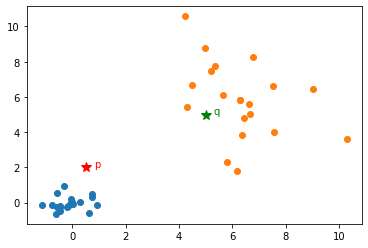

In [46]:
x1, y1 = norm.rvs(loc=0, scale=0.5, size=20), norm.rvs(loc=0, scale=0.5, size=20)
x2, y2 = norm.rvs(loc=6, scale=2, size=20), norm.rvs(loc=6, scale=2, size=20)

plt.plot(x1,y1,'o')
plt.plot(x2,y2,'o')

plt.plot(0.5, 2, marker='*', color='red', markersize=10)
plt.text(0.8, 2, 'p', color='red')

plt.plot(5, 5, marker='*', color='green', markersize=10)
plt.text(5.3, 5, 'q', color='green')

この問題を解決するた目の簡単な方法は、着目点を中心にした近傍に加えて、比較される相手方の近傍距離も考えることである。  
着目点を図の通り$p,q$としてその最近傍点をそれぞれ$p',q'$とする。  
次の2つの量を考える。
$$
a(p)=\frac{(pの最近傍点までの距離)}{(p'の最近傍点までの距離)}\\
a(q)=\frac{(qの最近傍点までの距離)}{(q'の最近傍点までの距離)}
$$

$a(q)$はほぼ1となり、$a(p)$は非常に大きい値になる。  
$q$の最近傍点$q'$は密集したクラスターの中にあるので、最近傍点までの距離が非常に小さいためである。  
これは、($k=1$の場合の)**局所外れ値度(LOF)**の定義である。
この定義を$k>1$の場合に拡張する。  
観測点$\boldsymbol{x'}$の$k$近傍を$N_k(\boldsymbol{x'})$と表す。  
$N_k(\boldsymbol{x'})$の要素をすべて含み$\boldsymbol{x'}$を中心とする最小の球の半径を$\epsilon_k(\boldsymbol{x'})$と表す。
このとき、近傍有効距離という量を次のように定義する。
>定義2.1(近傍有効距離)　距離$d$が定義された$M$次元空間において、$\boldsymbol{u}$から$\boldsymbol{u'}$への近傍有効距離$l_k(\boldsymbol{u}→\boldsymbol{u'})$は次のように定義される。
$$
l_k(\boldsymbol{u}→\boldsymbol{u'})=
\left\{\begin{array}{ll}
\epsilon_k(\boldsymbol{u'})&(\boldsymbol{u}\in N_k(\boldsymbol{u'})かつ\boldsymbol{u'}\in N_k(\boldsymbol{u}))\\
d(\boldsymbol{u},\boldsymbol{u'})&(それ以外)
\end{array}\right.
$$

この近傍有効距離を使うと、局所外れ値の考え方に基づく異常度$a_{LOF}(\boldsymbol{x'})$は次のように定義される。
$$
a_{LOF}(\boldsymbol{x'})=\frac{1}{k}\sum_{\boldsymbol{x}\in N_k(\boldsymbol{x'})}\frac{d_k(\boldsymbol{x'})}{d_k(\boldsymbol{x})}
$$
ここで
$$
d_k(\boldsymbol{u})=\frac{1}{k}\sum_{\boldsymbol{u'}\in N_k(\boldsymbol{u})}l_k(\boldsymbol{u}→\boldsymbol{u'})
$$

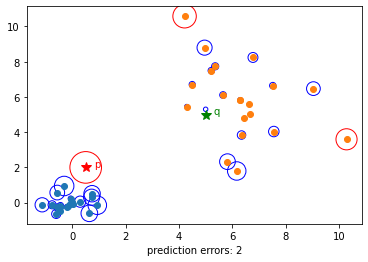

In [93]:
from sklearn.neighbors import LocalOutlierFactor

# データをまとめる
X = np.concatenate([
np.array(list(x1)+list(x2)+[0.5,5]).reshape(-1,1),
np.array(list(y1)+list(y2)+[2,5.3]).reshape(-1,1)
], axis=1)

# ラベルを作成
ground_truth = np.ones(len(X), dtype=int) # 正常：1
ground_truth[-2] = -1 # 異常：-1

# 外れ値検出のモデルの作成
clf = LocalOutlierFactor(n_neighbors=10, contamination=0.05)
y_pred = clf.fit_predict(X)

# 判定とスコア
n_errors = (y_pred != ground_truth).sum()
X_scores = clf.negative_outlier_factor_

# 基のデータをプロット
plt.plot(x1,y1,'o')
plt.plot(x2,y2,'o')

plt.plot(0.5, 2, marker='*', color='red', markersize=10)
plt.text(0.8, 2, 'p', color='red')

plt.plot(5, 5, marker='*', color='green', markersize=10)
plt.text(5.3, 5, 'q', color='green')

#外れ値スコアに比例する半径で円をプロットする
radius = (X_scores.max() - X_scores) / (X_scores.max() - X_scores.min())

# 正常:青
plt.scatter(X[y_pred==1, 0], X[y_pred==1, 1], s=1000 * radius[y_pred==1], edgecolors='b',
            facecolors='none', label='Outlier scores')
# 異常:赤
plt.scatter(X[y_pred==-1, 0], X[y_pred==-1, 1], s=1000 * radius[y_pred==-1], edgecolors='r',
            facecolors='none', label='Outlier scores')
plt.xlabel("prediction errors: %d" % (n_errors))
plt.show()

In [88]:
y_pred

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,
        1,  1,  1,  1,  1,  1, -1,  1])

#### カーネル密度推定
$M$次元データ$N$個からなる$D=\{\boldsymbol{x}^{(1)},\cdots,\boldsymbol{x}^{(N)}\}$が与えられているとする。  
カーネル密度推定法では、ある観測値$\boldsymbol{x}$と、$D$に含まれる観測値$\boldsymbol{x}^{(n)}$との間の類似度$K$を導入して、$\boldsymbol{x}$における確率密度を、
$$
p(\boldsymbol{x}|H,D)=\frac{1}{N}\sum_{n=1}^NK_H(\boldsymbol{x},\boldsymbol{x}^{(n)})
$$
のようにモデル化する。  
ここでは$K$が、類似度の到達距離を表すパラメータ$H$を持つとしている。  
$K_H$は一般に**核関数**または**カーネル関数**と呼ぶ。  
核関数としてもっともよく使われるのは正規分布である。
$$
K_H(\boldsymbol{x},\boldsymbol{x}^{(n)})=N(\boldsymbol{x}|\boldsymbol{x}^{(n)},H)
$$

特に、各変数を分散が1になるように個別に尺度変換した上で,$H=h^2|_M$のように単一の定数$h$のみをパラメータとして持つとしたモデル
$$
K_h(\boldsymbol{x},\boldsymbol{x}^{(n)})=\biggl(\frac{1}{2\pi h^2} \biggr)^{M/2}\exp\biggl(-\frac{1}{2h^2}|\boldsymbol{x}-\boldsymbol{x}^{(n)}|^2 \biggr)
$$
この核関数は、**動径基底関数展開**あるいはRBF展開とも呼ばれる。$h$または$H$のことを**バンド幅**と呼ぶ。  
  
パラメータ$H$をデータから最適に求める方法は、積分二乗誤差
$$
E(H|D)=\int d\boldsymbol{x}\{p_H(\boldsymbol{x})-p_真(\boldsymbol{x}) \}^2
$$
を最小化するように決めることである。  
通常、積分二乗誤差は
$$
\begin{align}
E(H|D)&=\int d\boldsymbol{x}p_H(\boldsymbol{x})^2-2\int d\boldsymbol{x}p_真(\boldsymbol{x})p_H(\boldsymbol{x})+\int d\boldsymbol{x} p_真(\boldsymbol{x})^2\\
&\approx \int d\boldsymbol{x}p_H(\boldsymbol{x})^2-\frac{2}{N}\sum_{n=1}^Np_H^{(-n)}(\boldsymbol{x}^{(n)})+(定数)
\end{align}
$$
第2項は、$p_真$を経験分布
$$
p_{emp}(\boldsymbol{x})=\frac{1}{N}\sum_{n=1}^N\delta(\boldsymbol{x}-\boldsymbol{x}^{(n)})
$$
で置き換えることで得られたものである。  
さらに、$\boldsymbol{x}^{(n)}$をモデルから抜いたカーネル密度推定の表式
$$
p_H^{-n}(\boldsymbol{x})=\frac{1}{N-1}\sum_{l=1;l\neq n}^N K_H(\boldsymbol{x},\boldsymbol{x}^{(l)})
$$
を使う。

>手順4(カーネル密度推定におけるバンド幅推定)
>1. $H$の候補値をあらかじめ$H^1,H^2,\cdots$と用意する
>2. $H$の候補それぞれについて積分二乗誤差の値を計算し、記録する
>3. 最小の積分二乗誤差を与える$H^i$を最適解として採用する



#### 実行例

観測値$\boldsymbol{x}'$の異常度を
$$
a(\boldsymbol{x}')=-\ln p(\boldsymbol{x}'|H,D)
$$
により計算する。  
データ$D$の中で異常度を計算する場合は、
$$
a(\boldsymbol{x}^{(n)})=-\ln \biggl\{\frac{1}{N-1}\sum_{m\neq n}K_H(\boldsymbol{x}^{(n)},\boldsymbol{x}^{(m)}) \biggr\}
$$
のように、自分自身をモデルから抜いた推定式で異常度を評価する。

In [23]:
from sklearn.neighbors import KernelDensity

def kde2D(x, y, bandwidth, xbins=100, ybins=100):
    # カーネル密度推定
    xy_train = np.vstack([y, x]).T
    kde_skl = KernelDensity(bandwidth=bandwidth, kernel='gaussian')
    kde_skl.fit(xy_train)
    
    # 表示用に全体の密度を計算
    xx, yy = np.meshgrid(np.linspace(x.min(),x.max(),100),
                         np.linspace(y.min(),y.max(),100))
    xy_sample = np.vstack([yy.ravel(), xx.ravel()]).T
    
    z = np.exp(kde_skl.score_samples(xy_sample))
    
    # データ点に対する密度行列の計算
    xx_train, yy_train = np.meshgrid(x, y)
    xy_train_sample = np.vstack([yy_train.ravel(), xx_train.ravel()]).T
    
    K = np.exp(kde_skl.score_samples(xy_train_sample))
    
    return xx, yy, np.reshape(z, xx.shape), np.reshape(K, xx_train.shape)

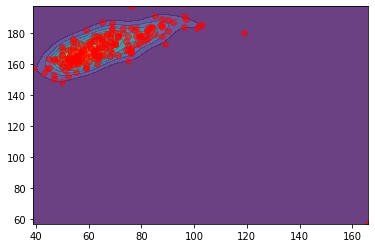

In [95]:
x, y = davis['weight'], davis['height']

xx, yy, zz, K = kde2D(x, y, bandwidth=4, xbins=1000, ybins=1000)

#plt.pcolormesh(xx, yy, zz, shading='auto');
plt.contourf(xx, yy, zz, alpha=.8, levels=np.linspace(zz.min(),zz.max(),12))
plt.scatter(x, y, color='red', alpha=.5)
#plt.xlim(40,110);
#plt.ylim(140,190);

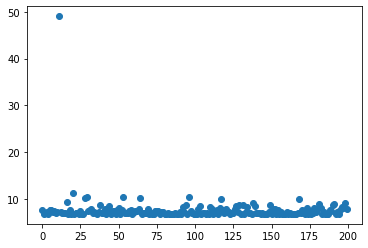

In [42]:
aa = np.sum(K, axis=0) - np.diag(K)
lowerLim = 10e-20
aa[aa<lowerLim] = lowerLim
a = (-1)*np.log(aa/(len(x)-1))

plt.plot(a, 'o');

### 4. 分布がひと山にならない場合：クラスタリングに基づく方法
#### k平均法
$M$次元データ$N$個からなる$D=\{\boldsymbol{x}^{(1)},\cdots,\boldsymbol{x}^{(N)}\}$が与えられているとする。  

>手順5(k平均法によるクラスタリング)　なんらかの手段でクラスター中心をだいたい予想し、それらを$\boldsymbol{\mu}_1,\boldsymbol{\mu}_2,\cdots,\boldsymbol{\mu}_k$とおく
>1. $n=1,2,\cdots,N$について、$\boldsymbol{x}^{(n)}$に一番近いクラスター中心を見つけ、そのクラスターに$\boldsymbol{x}^{(n)}$を所属させる
>2. $c=1,2,\cdots,k$について、クラスター中心ベクトル$\boldsymbol{\mu}_c$を、所属メンバーの平均として次のように計算する
$$
\boldsymbol{\mu}_c=\frac{1}{N_c}\sum_{cの所属メンバー}\boldsymbol{x}^{(n)}
$$
ただし、$N_c$はクラスター$c$に所属する標本の数である
>3. 1に戻る

#### 混合正規分布モデル
クラスター数を$K$とし、$k$番目のクラスターが、平均$\boldsymbol{\mu}_k$、共分散行列$\Sigma_k$の正規分布$N(\boldsymbol{x}|\boldsymbol{\mu}_k,\Sigma_k)$で表せるとする。  
これは、条件付き確率の記号を使うと$p(\boldsymbol{x}|z=k)$となる。  
ここで、$z$はクラスターの帰属先を示す確率変数で、値としては1から$K$までをとる。  
$z$に応じて決まる確率値そのものをパラメータとして$p(z)=\pi_z$と表す。  
当然、$\pi_1+\cdots+\pi_K=1$である。  
想定する確率モデルは次の通りとなる。
$$
p(\boldsymbol{x}|z)=N(\boldsymbol{x}|\boldsymbol{\mu}_z,\Sigma_z)\ および\ p(z)=\pi_z
$$

$z$を周辺化により消去して、$\boldsymbol{x}$のみの分布を作ると次のようになる。
$$
p(\boldsymbol{x}|\Theta)=\sum_{k=1}^K\pi_kN(\boldsymbol{x}|\boldsymbol{\mu}_k,\Sigma_k)
$$
ただし、$K$個のクラスターのもつパラメータをまとめて$\Theta$
$$
\Theta=\{\pi_1,\cdots,\pi_K,\boldsymbol{\mu}_1,\cdots,\boldsymbol{\mu}_K,\Sigma_1,\cdots,\Sigma_K\}
$$
と表している。
クラスタリングの問題とは、$\Theta$をデータから求めた後に、$p(z|\boldsymbol{x},\Theta)$を求め、その最大値を求める問題である。  
この$z$についての確率分布は、ベイズの定理から
$$
p(z|\boldsymbol{x},\Theta)=\frac{p(\boldsymbol{x}|z)p(z)}{\sum_{z'=1}^Kp(\boldsymbol{x}|z')p(z')}=\frac{N(\boldsymbol{x}|\boldsymbol{\mu}_z,\Sigma_z)\pi_z}{\sum_{z'=1}^KN(\boldsymbol{x}|\boldsymbol{\mu}_z',\Sigma_z')\pi_z'}
$$

この式の分母は$z$に依存しないので、混合正規分布によるクラスリングの手順は次のようになる。  

>手順6(混合正規分布モデルによるクラスタリング)
>1. データ$D$から混合正規分布のパラメータ$\Theta$を求める
>2. 各標本$\boldsymbol{x}^{(n)}(n=1,\cdots,N)$に対して、以下を行う  
 a. $z=1,\cdots,K$について、$\pi_zN(\boldsymbol{x}|\boldsymbol{\mu}_z,\Sigma_z)$を計算する  
 b. その名で最大値を与える$z$を$\boldsymbol{x}^{(n)}$の所属クラスターとする

任意の観測値$\boldsymbol{x'}$が来たとしたら、$K$個の中から最も当てはまりの良いクラスターを選ぶことができる。これは、機械学習では**分類問題**と呼ばれる。  
混合正規分布の対数尤度は、次式のようになる。
$$
L(\Theta|D)=\ln\prod_{i=1}^Np(\boldsymbol{x}^{(n)}|\Theta)=\sum_{n=1}^N\ln\sum_{k=1}^K\pi_kN(\boldsymbol{x}^{(n)}|\boldsymbol{\mu}_k,\Sigma_k)
$$

「標本が$K$個のクラスターのどれから出てきたかわからない」ために、解析的に最適解を求めることはできない。  
そこで、出身クラスターを表す確率変数$z$の値が、$\boldsymbol{x}^{(n)}$に対して既知であるかのようにみなして、次の量を最大化するパラメータを求める問題に読み替える。  
$$
L(\Theta|D,\boldsymbol{Z})=\sum_{n=1}^N\sum_{k=1}^K\delta(z^{(n)},k)\ln\bigl\{\pi_kN(\boldsymbol{x}^{(n)}|\boldsymbol{\mu}_k,\Sigma_k) \bigr\}
$$

$z^{(n)}$は観測されない仮想的な値のため、期待値-最大化法を使う。  
$\delta(z^{(n)},k)$の部分を「標本$\boldsymbol{x}^{(n)}$が第$k$クラスター出身である度合い」$q_k^{(n)}$とおく。  
$$
q_k^{(n)}\propto \pi_kN(\boldsymbol{x}^{(n)}|\boldsymbol{\mu}_k,\Sigma_k)
$$

現時点で手元にある$\{\pi_k,\boldsymbol{\mu}_k,\Sigma_k \}(k=1,\cdots,K)$を用いて$q_k^{(n)}$を計算し、  
計算された$q_k^{(n)}$を用いて$\{\pi_k,\boldsymbol{\mu}_k,\Sigma_k \}$を再計算という手順を繰り返す。  

>手順7(混合正規分布の期待値-最大化法)
>1. 初期化:　混合正規分布のパラメータ
$$
\hat{\Theta}=\{\hat{\pi}_1,\cdots,\hat{\pi}_K,\boldsymbol{\hat{\mu}}_1,\cdots,\boldsymbol{\hat{\mu}}_K,\hat{\Sigma}_1,\cdots,\hat{\Sigma}_K\}
$$
に適当な初期値を設定する
>2. 反復:　収束するまで以下を繰り返す  
　a. 期待値ステップ:　現在のパラメータ推定値$\hat{\Theta}$を用いて、各標本の各要素への帰属度$q_k^{(n)}$を次式で求める
$$
q_k^{(n)}=\frac{\hat{\pi}_kN(\boldsymbol{x}^{(n)}|\boldsymbol{\hat{\mu}}_k,\hat{\Sigma}_k)}{\sum_{l=1}^K\hat{\pi}_kN(\boldsymbol{x}^{(n)}|\boldsymbol{\hat{\mu}}_l,\hat{\Sigma}_l)}
$$
　b. 最大化ステップ:　現在の帰属度$q_k^{(n)}$を基にして、パラメータ$\{\pi_k,\boldsymbol{\mu}_k\}(k=1,\cdots,K)$の推定値を次式で求める
$$
\hat{\pi}_k=\frac{1}{N}\sum_{n=1}^Nq_k^{(n)}\\
\hat{\boldsymbol{\mu}}_k=\frac{\sum_{n=1}^Nq_k^{(n)}\boldsymbol{x}^{(n)}}{\sum_{n=1}^Nq_k^{(n)}}
$$
さらに、パラメータ$\{\Sigma\}(k=1,\dots,K)$の推定値を次式で求める。
$$
\hat{\Sigma}_k=\frac{\sum_{n=1}^Nq_k^{(n)}(\boldsymbol{x}^{(n)}-\boldsymbol{\hat{\mu}}_k)(\boldsymbol{x}^{(n)}-\boldsymbol{\hat{\mu}}_k)^T}{\sum_{n=1}^Nq_k^{(n)}}
$$
これらを新しいパラメータ推定値$\hat{\Theta}$とする

#### 実行例
異常度は次のように定義する。
$$
a(\boldsymbol{x'})=-\ln\biggl\{\sum_{k=1}^K\hat{\pi}_kN(\boldsymbol{x}'|\boldsymbol{\hat{\mu}}_k,\hat{\Sigma}_k) \biggr\}
$$

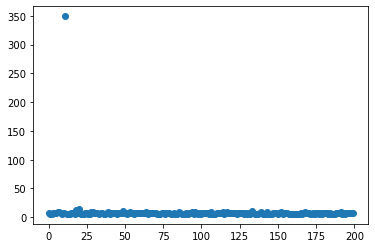

In [93]:
from sklearn.mixture import BayesianGaussianMixture
from scipy.stats import multivariate_normal

# データの準備
x = davis[['weight', 'height']]
xx = x[x.index!=12]

# 混合ガウスモデルによるクラスタリング
vbgm = BayesianGaussianMixture(n_components=10, random_state=6)
vbgm.fit(xx)

# 各分布の重み
use_idx = vbgm.weights_>0.1 # 0.1以下のものは使用しない

# 各分布の密度と重み
mp = np.array([multivariate_normal(m, c).pdf(x) for i, (m, c) in enumerate(zip(vbgm.means_, vbgm.covariances_)) if use_idx[i]])
pi = vbgm.weights_[use_idx]

# 異常度の計算
a = -np.log(pi@mp)

plt.plot(a, 'o');

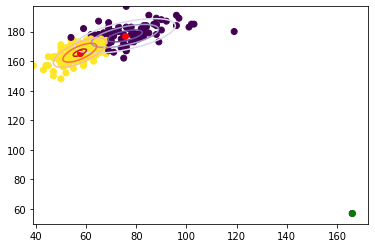

In [94]:
# ラベル
labels=vbgm.predict(x)

# 色の設定
cmaps = ['Purples', 'Blues', 'Reds', 'Greens']

# 表示用のグリッド
xm, ym = np.meshgrid(np.linspace(xx['weight'].min(),xx['weight'].max(),100),
                     np.linspace(xx['height'].min(),xx['height'].max(),100))  
xy_sample = np.vstack([xm.ravel(), ym.ravel()]).T

# 各ガウス分布における等高線の表示
for i, (m, c) in enumerate(zip(vbgm.means_, vbgm.covariances_)):
    if use_idx[i]:
        mp = multivariate_normal(m, c).pdf(xy_sample).reshape(100,100)
        plt.contour(xm, ym, mp, levels=3, cmap=cmaps[i])

plt.scatter(x['weight'],x['height'], c=labels)
plt.scatter(x.loc[a>250, 'weight'],x.loc[a>250, 'height'], color='green')
plt.scatter(vbgm.means_[use_idx,0],vbgm.means_[use_idx,1], color='red')

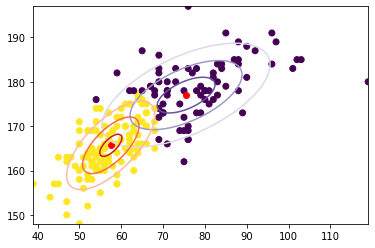

In [86]:
# ラベル
labels=vbgm.predict(xx)

# 色の設定
cmaps = ['Purples', 'Blues', 'Reds', 'Greens']

# 表示用のグリッド
xm, ym = np.meshgrid(np.linspace(xx['weight'].min(),xx['weight'].max(),100),
                     np.linspace(xx['height'].min(),xx['height'].max(),100))  
xy_sample = np.vstack([xm.ravel(), ym.ravel()]).T

# 各ガウス分布における等高線の表示
for i, (m, c) in enumerate(zip(vbgm.means_, vbgm.covariances_)):
    if use_idx[i]:
        mp = multivariate_normal(m, c).pdf(xy_sample).reshape(100,100)
        plt.contour(xm, ym, mp, levels=3, cmap=cmaps[i])

plt.scatter(xx['weight'],xx['height'], c=labels)
plt.scatter(vbgm.means_[use_idx,0],vbgm.means_[use_idx,1], color='red')

In [62]:
mp = np.array([multivariate_normal(m, c).pdf(x) for i, (m, c) in enumerate(zip(vbgm.means_, vbgm.covariances_)) if use_idx[i]])
pi = vbgm.weights_[use_idx]

a = -np.log(pi@mp)

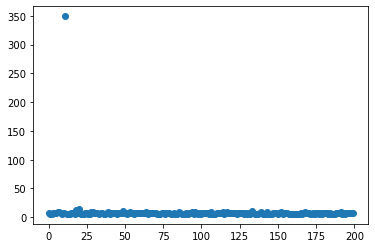

In [63]:
plt.plot(a, 'o');

In [66]:
xx

,weight,height
1,77,182
2,58,161
3,53,161
4,68,177
5,59,157
...,...,...
196,74,175
197,83,180
198,81,175
199,90,181


混合正規分布を異常検知に使う際は、異常標本がいつも含まれないように慎重にデータのクレンジングを行う必要がある。

### 6. 支持ベクトルデータ記述法に基づく異常判定
データ$D=\{\boldsymbol{x}^{(1)},\cdots,\boldsymbol{x}^{(N)}\}$が与えられたときに、データのほぼ全体を囲む球を考え、その球に入りきらなかったものを異常とする。  
これは**1クラスサポートベクトルマシン**と呼ばれる手法である。  
  
データを含むという条件の下で、できる限り小さい球を求める。  
これは次のような最適化問題として表せる。  
$$
\min_{R,\boldsymbol{b}}R^2\ subject\ to\ |\boldsymbol{x}^{(n)}-\boldsymbol{b}|^2\leq R^2
$$

ここで$\boldsymbol{x}^{(n)}$に対して、半径の2乗に$u^{n}$分だけ許容した上で問題を解く。 $$
\min_{R,\boldsymbol{b},\boldsymbol{u}}\biggl\{R^2+C\sum_{n=1}^Nu^{(n)} \biggr\}\ subject\ to\ |\boldsymbol{x}^{(n)}-\boldsymbol{b}|^2\leq R^2+u^{(n)}
$$

この問題の解を$(R^*,\boldsymbol{b}^*,\boldsymbol{u}^*)$とする。  
異常度は直感的に「球からはみ出した長さ」として
$$
a(\boldsymbol{x}')=|\boldsymbol{x}'-\boldsymbol{b}^*|^2-R^{*2}
$$
のように定義できる。2乗を展開して、
$$
a(\boldsymbol{x}')=\kappa(\boldsymbol{x}',\boldsymbol{x}')-2\kappa(\boldsymbol{b}^*,\boldsymbol{x}')+\kappa(\boldsymbol{b}^*,\boldsymbol{b}^*)-R^{*2}
$$
と表しておく。ただし、$\kappa(・)$は引数同士の内積を表す。  
カーネルトリックとは、内積の定義を、もともとの$\kappa(\boldsymbol{x}',\boldsymbol{x}^{(n)})=\boldsymbol{x}'^T\boldsymbol{x}^{(n)}$から、適切な条件を満たす関数、例えば、
$$
\kappa(\boldsymbol{x}',\boldsymbol{x}^{(n)})=\exp\bigl(-\sigma|\boldsymbol{x}'-\boldsymbol{x}^{(n)}|^2 \bigr)
$$
に置換することを意味する。これはRBFカーネルと呼ぶ。  
カーネルトリックを利用すれば、非線形な関係を、非線形変換を明示的に与えなくても扱える。

In [88]:
from sklearn.svm import OneClassSVM
from sklearn.preprocessing import StandardScaler

# 標準化
scaler = StandardScaler()
data_scaled = scaler.fit_transform(davis[['weight', 'height']])

# OCSVMモデル作成
ocsvm = OneClassSVM(nu=0.05, kernel='rbf', gamma='auto')
ocsvm.fit(data_scaled)

OneClassSVM(gamma='auto', nu=0.05)

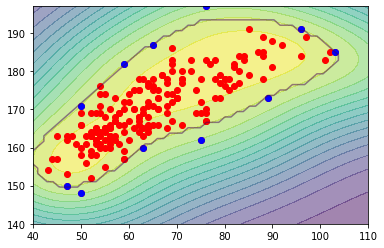

In [90]:
from sklearn.svm import OneClassSVM
from sklearn.preprocessing import StandardScaler

# 標準化
scaler = StandardScaler()
data_scaled = scaler.fit_transform(davis[['weight', 'height']])

# OCSVMモデル作成
ocsvm = OneClassSVM(nu=0.05, kernel='rbf', gamma='auto')
ocsvm.fit(data_scaled)

# 表示用のグリッドを用意
x, y = data_scaled[:,0], data_scaled[:, 1]
xx, yy = np.meshgrid(np.linspace(x.min(),x.max(),100),
                     np.linspace(y.min(),y.max(),100))
xy_sample = np.vstack([xx.ravel(), yy.ravel()]).T

# decision_functionで超平面からの距離
y_pred = ocsvm.decision_function(xy_sample).reshape(100,100)

# predictで判定結果(正常:1,異常:-1)
Z = ocsvm.predict(xy_sample).reshape(100,100)

# 標準化したデータを元に戻す
data_inv = scaler.inverse_transform(np.vstack([np.linspace(x.min(),x.max(),100), np.linspace(y.min(),y.max(),100)]).T)

# 支持ベクトルも元の単位に変換
supports = scaler.inverse_transform(ocsvm.support_vectors_)

# データの表示
plt.contourf(data_inv[:,0], data_inv[:,1], y_pred, levels=15, alpha=.5)
plt.contour(data_inv[:,0], data_inv[:,1], Z, levels=[0], alpha=.5)
plt.scatter(davis['weight'],davis['height'], color='red')
plt.scatter(supports[:,0], supports[:,1], color='blue')
plt.xlim(40,110);
plt.ylim(140,);

In [12]:
np.sqrt((224**2)*1.15)

240.21323860270482

In [7]:
112/80

1.4